  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Mounted at /content/drive
Training Data:


,label,tagged_in_context
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed."
1,not_propaganda,This declassification effort <BOS> won’t make ...
2,flag_waving,The Obama administration misled the <BOS> Amer...
3,not_propaganda,“It looks like we’re capturing the demise of t...
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>"


Validation Data:


,label,tagged_in_context
0,not_propaganda,"On average, between 300 and 600 infections are..."
1,causal_oversimplification,Mostly because <BOS> the country would not las...
2,appeal_to_fear_prejudice,Lyndon Johnson <BOS> gets Earl Warren and Sen....
3,not_propaganda,<BOS> You <EOS> may opt out at anytime.
4,repetition,It must be exacted from him directly in order ...



Example sentences from the training set:
1. Stability is one <BOS> reason [for autonomy], but is stability understood in such a way that it can obstruct the spirit of <EOS> mission and your availability to the Order and to the Church? 
2. As expected, two Muslim women, Rashida Tlaib in Michigan and Ilhan Omar in Minnesota, <BOS> have been overwhelmingly elected <EOS> to Congress. 
3. <BOS> One woman (was) screaming through my door that I should be killed and I should die <EOS>, he told reporters at Friday's news conference. 
4. Dr. Epstein’s research found that when negative search terms are suggested for a candidate, it can have <BOS> a dramatic effect <EOS> on voter opinion. 
5. But the plaintiffs aren’t looking <BOS> for flexibility. <EOS> 

Model Evaluation:
Accuracy: 0.7017241379310345
Precision: 0.712
Recall: 0.6379928315412187
F1 Score: 0.6729678638941399


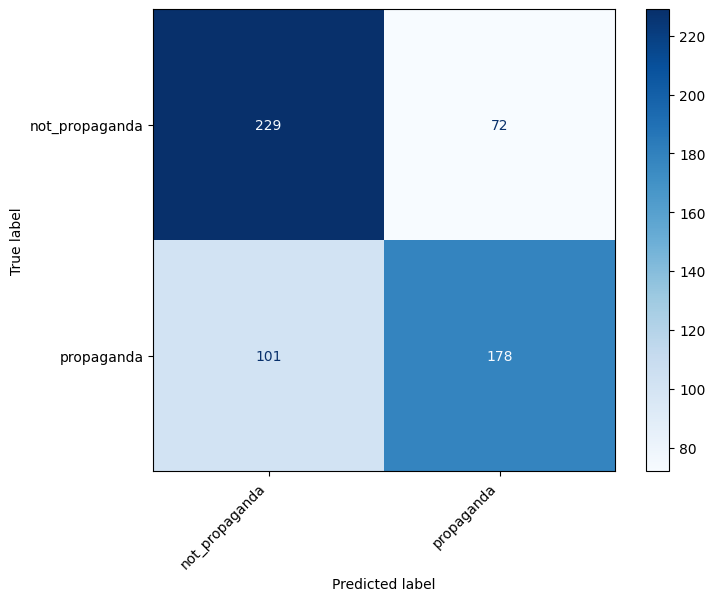

In [ ]:
# Task 1: Identify whether a sentence contains propaganda, tags kept in. BOW
# Import necessary libraries
!pip install sklearn matplotlib --quiet

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Mount Google Drive to access the dataset files
from google.colab import drive
drive.mount('/content/drive')

# Load the datasets
train_path = '/content/drive/My Drive/propaganda_dataset_v2/propaganda_train.tsv'
val_path = '/content/drive/My Drive/propaganda_dataset_v2/propaganda_val.tsv'

train_df = pd.read_csv(train_path, sep='\t')
val_df = pd.read_csv(val_path, sep='\t')

# Display the first few rows to confirm data loading
print("Training Data:")
display(train_df.head())
print("Validation Data:")
display(val_df.head())

# Filter out 'not_propaganda' rows for binary classification task
binary_train_df = train_df.copy()
binary_train_df['label'] = binary_train_df['label'].apply(lambda x: 'propaganda' if x != 'not_propaganda' else 'not_propaganda')

binary_val_df = val_df.copy()
binary_val_df['label'] = binary_val_df['label'].apply(lambda x: 'propaganda' if x != 'not_propaganda' else 'not_propaganda')

# Use the entire sentence for classification
binary_train_df['text'] = binary_train_df['tagged_in_context']
binary_val_df['text'] = binary_val_df['tagged_in_context']

# Print out a few example sentences that will go into the Bag of Words
print("\nExample sentences from the training set:")
example_sentences = binary_train_df['text'].sample(5).tolist()
for i, sentence in enumerate(example_sentences, 1):
    print(f"{i}. {sentence}")

# Vectorise the text using Bag of Words
vectoriser = CountVectorizer()

X_train = vectoriser.fit_transform(binary_train_df['text'])
y_train = binary_train_df['label']

X_val = vectoriser.transform(binary_val_df['text'])
y_val = binary_val_df['label']

# Train a Logistic Regression model
binary_model = LogisticRegression(max_iter=1000)
binary_model.fit(X_train, y_train)

# Evaluate the model
y_pred = binary_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='binary', pos_label='propaganda')

print(f"\nModel Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay & https://scikit-learn.org/stable/modules/model_evaluation.html
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=['not_propaganda', 'propaganda'])

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not_propaganda', 'propaganda'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=45, ha='right')
plt.show()


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Training Data:


,label,tagged_in_context
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed."
1,not_propaganda,This declassification effort <BOS> won’t make ...
2,flag_waving,The Obama administration misled the <BOS> Amer...
3,not_propaganda,“It looks like we’re capturing the demise of t...
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>"


Validation Data:


,label,tagged_in_context
0,not_propaganda,"On average, between 300 and 600 infections are..."
1,causal_oversimplification,Mostly because <BOS> the country would not las...
2,appeal_to_fear_prejudice,Lyndon Johnson <BOS> gets Earl Warren and Sen....
3,not_propaganda,<BOS> You <EOS> may opt out at anytime.
4,repetition,It must be exacted from him directly in order ...



Example sentences from the training set:
1. He wrote to the pope, “ To teach with such an intentional lack of clarity inevitably risks sinning against the Holy Spirit, the Spirit of truth .” He added that Catholics are “disconcerted” by the appointment of bishops “who seem not merely open to those who hold views counter to Christian belief, but who support and even defend them.”
2. The economy is doing exactly what he promised it  would.
3. Deadly Plague Could MUTATE And  Become Untreatable As It Spreads Globally
4. The non-Muslims are  nothing but dirt .
5. It’s essentially an admission of guilt , given that it is absolutely ludicrous to think that “national security” would be threatened by the release of the CIA’s long-secret JFK-assassination-related records.
Accuracy: 0.6913793103448276
Precision: 0.7
Recall: 0.6272401433691757
F1 Score: 0.6616257088846881


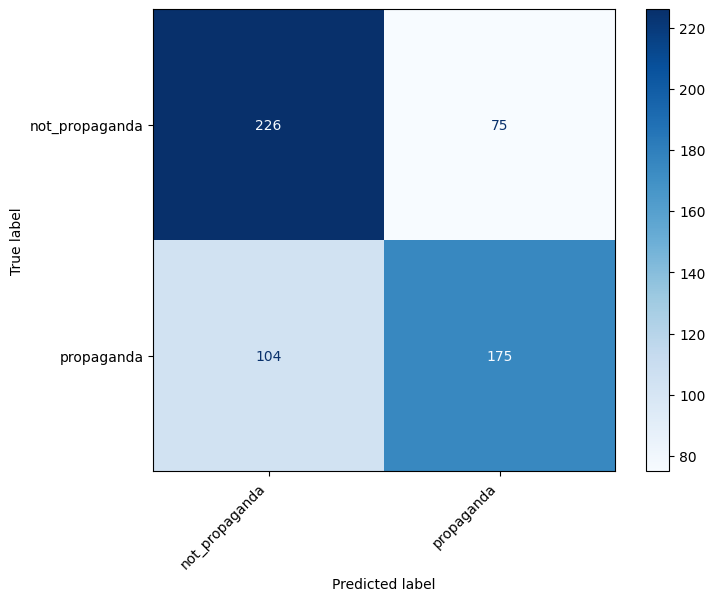

In [ ]:
# Task 1: Identify whether a sentence contains propaganda, tags removed. BOW
# Import necessary libraries
!pip install sklearn matplotlib --quiet

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the datasets
train_path = '/content/drive/My Drive/propaganda_dataset_v2/propaganda_train.tsv'
val_path = '/content/drive/My Drive/propaganda_dataset_v2/propaganda_val.tsv'

train_df = pd.read_csv(train_path, sep='\t')
val_df = pd.read_csv(val_path, sep='\t')

# Display the first few rows to confirm data loading
print("Training Data:")
display(train_df.head())
print("Validation Data:")
display(val_df.head())

# Filter out 'not_propaganda' rows for binary classification task
binary_train_df = train_df.copy()
binary_train_df['label'] = binary_train_df['label'].apply(lambda x: 'propaganda' if x != 'not_propaganda' else 'not_propaganda')

binary_val_df = val_df.copy()
binary_val_df['label'] = binary_val_df['label'].apply(lambda x: 'propaganda' if x != 'not_propaganda' else 'not_propaganda')

# Function to remove <BOS> and <EOS> tags from text
def remove_tags(text):
    return text.replace('<BOS>', '').replace('<EOS>', '').strip()

# Remove tags from the text for classification
binary_train_df['text'] = binary_train_df['tagged_in_context'].apply(remove_tags)
binary_val_df['text'] = binary_val_df['tagged_in_context'].apply(remove_tags)

# Print out a few example sentences that will go into the Bag of Words (for verification)
print("\nExample sentences from the training set:")
example_sentences = binary_train_df['text'].sample(5).tolist()
for i, sentence in enumerate(example_sentences, 1):
    print(f"{i}. {sentence}")

# Vectorise the text using Bag of Words
vectoriser = CountVectorizer()

X_train = vectoriser.fit_transform(binary_train_df['text'])
y_train = binary_train_df['label']

X_val = vectoriser.transform(binary_val_df['text'])
y_val = binary_val_df['label']

# Train a Logistic Regression model
binary_model = LogisticRegression(max_iter=1000)
binary_model.fit(X_train, y_train)

# Evaluate the model
y_pred = binary_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='binary', pos_label='propaganda')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay & https://scikit-learn.org/stable/modules/model_evaluation.html

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=['not_propaganda', 'propaganda'])

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not_propaganda', 'propaganda'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=45, ha='right')
plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 308.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 330.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 308.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 214.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 288.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 160.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 273.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 165.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 264.2 MB/s eta 0:00:00
   

,label,tagged_in_context
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed."
1,not_propaganda,This declassification effort <BOS> won’t make ...
2,flag_waving,The Obama administration misled the <BOS> Amer...
3,not_propaganda,“It looks like we’re capturing the demise of t...
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>"


,label,tagged_in_context
0,not_propaganda,"On average, between 300 and 600 infections are..."
1,causal_oversimplification,Mostly because <BOS> the country would not las...
2,appeal_to_fear_prejudice,Lyndon Johnson <BOS> gets Earl Warren and Sen....
3,not_propaganda,<BOS> You <EOS> may opt out at anytime.
4,repetition,It must be exacted from him directly in order ...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

No, <BOS> he <EOS> will not be confirmed. 
This declassification effort <BOS> won’t make things any worse than they are for President Trump. <EOS> 
The Obama administration misled the <BOS> American people <EOS> and Congress because they were desperate to get a deal with Iran, said Sen. 
“It looks like we’re capturing the demise of this dark vortex, <BOS> and <EOS> it’s different from what well-known studies led us to expect,” said Michael H. Wong of the University of California at Berkeley says. 
<BOS> Location: Westerville, Ohio <EOS> 
Hitler <BOS> annihilated <EOS> 400,000 Germans who were handicapped or suffered from chronic diseases. 
A federal judge on Monday ordered U.S. immigration officials to delay any efforts to deport 51 Indonesians living illegally in New Hampshire so the group can have time <BOS> to argue that changing conditions in that country would make it dangerous to return... Federal law gives authority over immigration matters to the executive <EOS> branch, not the

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.597800,0.341807,0.867241,0.857671,0.885496,0.831541
2,0.261500,0.265792,0.901724,0.889320,0.970339,0.820789
3,0.180700,0.258150,0.934483,0.929368,0.965251,0.896057
4,0.092200,0.197368,0.951724,0.950000,0.946619,0.953405
5,0.022100,0.199546,0.956897,0.955437,0.950355,0.960573


{'eval_loss': 0.199545755982399, 'eval_accuracy': 0.9568965517241379, 'eval_f1': 0.9554367201426025, 'eval_precision': 0.950354609929078, 'eval_recall': 0.9605734767025089, 'eval_runtime': 8.6905, 'eval_samples_per_second': 66.739, 'eval_steps_per_second': 4.258, 'epoch': 5.0}


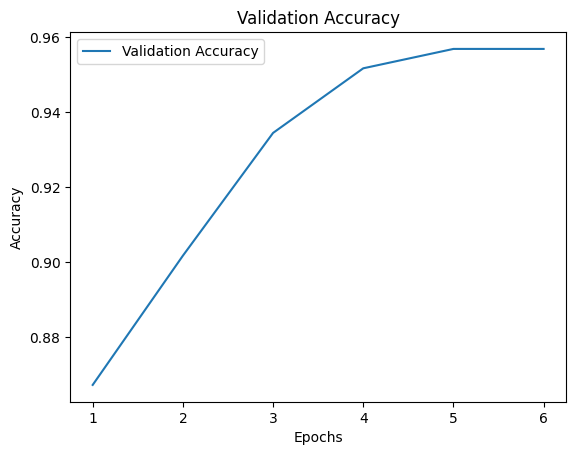

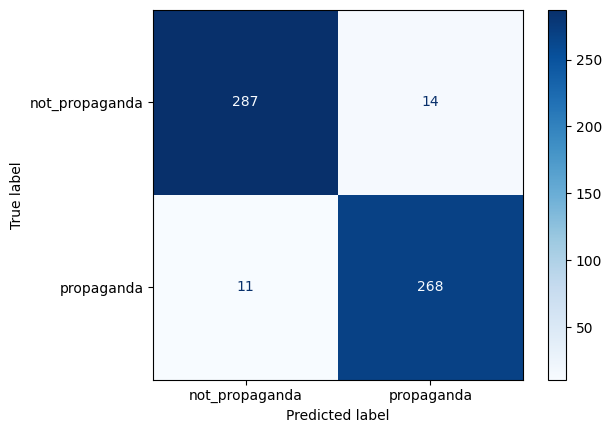

In [ ]:
# Approach 2: BERT - With tags Left in
# Forcefully upgrade transformers and accelerate as they wouldn't update.
!pip install transformers[torch] --upgrade --no-cache-dir
!pip install accelerate --upgrade --no-cache-dir

# And then verify the versions of transformers and accelerate
import transformers
import accelerate

print("Transformers version:", transformers.__version__)
print("Accelerate version:", accelerate.__version__)

import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive to access the dataset files
from google.colab import drive
drive.mount('/content/drive')

# File paths for the training and validation datasets
train_path = '/content/drive/My Drive/propaganda_dataset_v2/propaganda_train.tsv'
val_path = '/content/drive/My Drive/propaganda_dataset_v2/propaganda_val.tsv'

# Load the datasets into pandas dataframes
train_df = pd.read_csv(train_path, sep='\t')
val_df = pd.read_csv(val_path, sep='\t')

# Display the first few rows to confirm data loading
display(train_df.head())
display(val_df.head())

# Function to preprocess the data by tokenising the text and encoding the labels, Bert Tokeniser: https://huggingface.co/docs/transformers/v4.41.2/en/model_doc/bert#transformers.BertTokenizer
def preprocess_data(df):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # Load the pre-trained BERT tokeniser
    texts = df['tagged_in_context'].tolist()  # Extract the text data
    labels = df['label'].apply(lambda x: 0 if x == 'not_propaganda' else 1).tolist()  # Convert labels to binary format
    for text in texts[:10]:
        print(text)
    encodings = tokenizer(texts, truncation=True, padding=True)  # Tokenise the text data

    return encodings, labels

# Preprocess the training and validation data
train_encodings, train_labels = preprocess_data(train_df)
val_encodings, val_labels = preprocess_data(val_df)

# Custom Dataset class to handle the tokenised inputs and labels, discussed: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset
class PropagandaDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}  # Convert to tensors
        item['labels'] = torch.tensor(self.labels[idx])  # Add the labels
        return item

    def __len__(self):
        return len(self.labels)

# Create Dataset objects for training and validation data
train_dataset = PropagandaDataset(train_encodings, train_labels)
val_dataset = PropagandaDataset(val_encodings, val_labels)

# Load the pre-trained BERT model for sequence classification
# Documentation: https://huggingface.co/transformers/model_doc/bert.html#transformers.BertForSequenceClassification (LAB 9) https://huggingface.co/transformers/v2.4.0/quickstart.html
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2) #Binary Classifcation

# Define the training arguments
# Adapted from Hugging Face tutorial: https://huggingface.co/docs/transformers/v4.41.2/en/tasks/object_detection#training-the-detection-model
training_args = TrainingArguments(
    output_dir='./results',  # Directory to save the results
    num_train_epochs=5,  # Number of training epochs
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,  # Batch size for evaluation
    warmup_steps=500,  # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,  # Weight decay for optimiser
    logging_dir='./logs',  # Directory to save the logs
    evaluation_strategy="epoch",  # Evaluate at each epoch
    logging_strategy="epoch",  # Log at each epoch
    learning_rate=5e-5  # Learning rate
)

# Function to compute evaluation metrics
# Documentation for metrics: https://scikit-learn.org/stable/modules/model_evaluation.html
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)  # Get the predicted labels
    precision, recall, f1, _ = precision_recall_fscore_support(labels, pred, average='binary')  # Calculate precision, recall, f1 score
    acc = accuracy_score(labels, pred)  # Calculate accuracy
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Define a callback to log accuracy
# Documentation: https://huggingface.co/transformers/main_classes/trainer.html#transformers.TrainerCallback & https://huggingface.co/docs/transformers/v4.41.2/en/main_classes/callback#transformers.TrainerCallback.on_log
class AccuracyCallback(TrainerCallback):
    def __init__(self):
        self.train_acc = []
        self.val_acc = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if "eval_accuracy" in logs:
            self.val_acc.append(logs["eval_accuracy"])
        if "train_accuracy" in logs:
            self.train_acc.append(logs["train_accuracy"])

# Initialise the callback
accuracy_callback = AccuracyCallback()

# Initialise the Trainer with the model, training arguments, datasets, and metrics function
# Documentation: https://huggingface.co/transformers/training.html
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[accuracy_callback],
)

# Train the model
trainer.train()

# Evaluate the model on the validation dataset
results = trainer.evaluate()
print(results)  # Print the evaluation results

# Plot the training and validation accuracy
# Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
epochs = range(1, len(accuracy_callback.val_acc) + 1)
plt.plot(epochs, accuracy_callback.val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')  # Extra epoch is just a duplication of the 5th epoch result, ignore 6th epoch.
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')
plt.show()

# Generate predictions for the validation dataset
predictions = trainer.predict(val_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

# Compute the confusion matrix
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay & https://scikit-learn.org/stable/modules/model_evaluation.html
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not_propaganda', 'propaganda'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


Transformers version: 4.41.1
Accelerate version: 0.30.1
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,label,tagged_in_context
0,not_propaganda,"No, <BOS> he <EOS> will not be confirmed."
1,not_propaganda,This declassification effort <BOS> won’t make ...
2,flag_waving,The Obama administration misled the <BOS> Amer...
3,not_propaganda,“It looks like we’re capturing the demise of t...
4,not_propaganda,"<BOS> Location: Westerville, Ohio <EOS>"


,label,tagged_in_context
0,not_propaganda,"On average, between 300 and 600 infections are..."
1,causal_oversimplification,Mostly because <BOS> the country would not las...
2,appeal_to_fear_prejudice,Lyndon Johnson <BOS> gets Earl Warren and Sen....
3,not_propaganda,<BOS> You <EOS> may opt out at anytime.
4,repetition,It must be exacted from him directly in order ...


No,  he  will not be confirmed.
This declassification effort  won’t make things any worse than they are for President Trump.
The Obama administration misled the  American people  and Congress because they were desperate to get a deal with Iran, said Sen.
“It looks like we’re capturing the demise of this dark vortex,  and  it’s different from what well-known studies led us to expect,” said Michael H. Wong of the University of California at Berkeley says.
Location: Westerville, Ohio
Hitler  annihilated  400,000 Germans who were handicapped or suffered from chronic diseases.
A federal judge on Monday ordered U.S. immigration officials to delay any efforts to deport 51 Indonesians living illegally in New Hampshire so the group can have time  to argue that changing conditions in that country would make it dangerous to return... Federal law gives authority over immigration matters to the executive  branch, not the courts.
Kirstjen Nielsen (@SecNielsen)  November 19, 2018
As noted above, at t

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.659200,0.560432,0.720690,0.747664,0.661157,0.860215
2,0.488100,0.472904,0.767241,0.762742,0.748276,0.777778
3,0.308700,0.553517,0.772414,0.761733,0.767273,0.756272
4,0.150800,0.812323,0.756897,0.730402,0.782787,0.684588
5,0.048900,1.091322,0.787931,0.785340,0.765306,0.806452


Epoch 1.0: Validation Accuracy: 0.7206896551724138
Epoch 2.0: Validation Accuracy: 0.7672413793103449
Epoch 3.0: Validation Accuracy: 0.7724137931034483
Epoch 4.0: Validation Accuracy: 0.756896551724138
Epoch 5.0: Validation Accuracy: 0.7879310344827586


{'eval_loss': 1.0913220643997192, 'eval_accuracy': 0.7879310344827586, 'eval_f1': 0.7853403141361257, 'eval_precision': 0.7653061224489796, 'eval_recall': 0.8064516129032258, 'eval_runtime': 8.6914, 'eval_samples_per_second': 66.733, 'eval_steps_per_second': 4.257, 'epoch': 5.0}


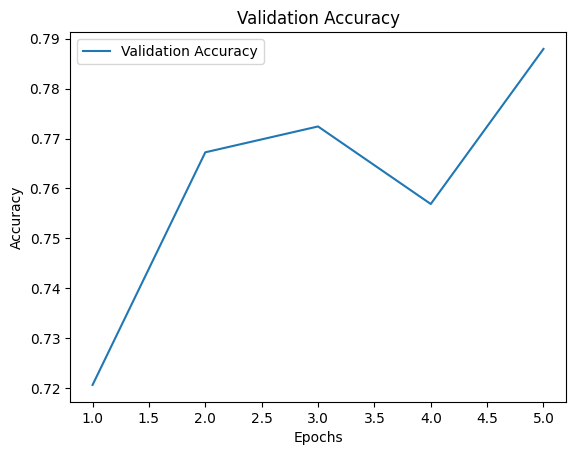

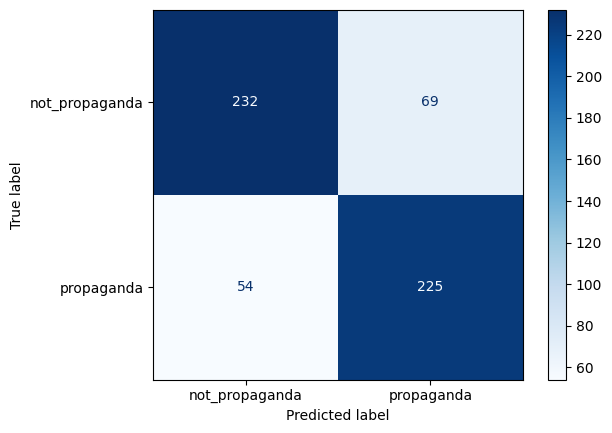

In [ ]:
# BERT - With tags removed
# Forcefully upgrade transformers and accelerate as they wouldn't update
!pip install transformers[torch] --upgrade --no-cache-dir
!pip install accelerate --upgrade --no-cache-dir

import transformers
import accelerate
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import re

# Print the versions to ensure they are correct
print("Transformers version:", transformers.__version__)
print("Accelerate version:", accelerate.__version__)

# Mount Google Drive to access the dataset files
from google.colab import drive
drive.mount('/content/drive')

# File paths for the training and validation datasets
train_path = '/content/drive/My Drive/propaganda_dataset_v2/propaganda_train.tsv'
val_path = '/content/drive/My Drive/propaganda_dataset_v2/propaganda_val.tsv'

# Load the datasets into pandas dataframes
train_df = pd.read_csv(train_path, sep='\t')
val_df = pd.read_csv(val_path, sep='\t')

# Display the first few rows to confirm data loading
display(train_df.head())
display(val_df.head())

# Function to remove <BOS> and <EOS> tags
def remove_tags(text):
    return re.sub(r'<BOS>|<EOS>', '', text).strip()

# Function to preprocess the data by tokenising the text and encoding the labels, Bert Tokeniser: https://huggingface.co/docs/transformers/v4.41.2/en/model_doc/bert#transformers.BertTokenizer
def preprocess_data(df):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # Load the pre-trained BERT tokeniser
    texts = df['tagged_in_context'].apply(remove_tags).tolist()  # Remove tags and extract the text data
    labels = df['label'].apply(lambda x: 0 if x == 'not_propaganda' else 1).tolist()  # Convert labels to binary format
    encodings = tokenizer(texts, truncation=True, padding=True)  # Tokenise the text data
    for text in texts[:10]:
        print(text)
    return encodings, labels

# Preprocess the training and validation data
train_encodings, train_labels = preprocess_data(train_df)
val_encodings, val_labels = preprocess_data(val_df)

# Custom Dataset class to handle the tokenised inputs and labels
class PropagandaDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}  # Convert to tensors
        item['labels'] = torch.tensor(self.labels[idx])  # Add the labels
        return item

    def __len__(self):
        return len(self.labels)

# Create Dataset objects for training and validation data
train_dataset = PropagandaDataset(train_encodings, train_labels)
val_dataset = PropagandaDataset(val_encodings, val_labels)

# Load the pre-trained BERT model for sequence classification
# Documentation: https://huggingface.co/transformers/model_doc/bert.html#transformers.BertForSequenceClassification (LAB 9) https://huggingface.co/transformers/v2.4.0/quickstart.html
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2) #Binary classifaction

# Define the training arguments
# Adapted from Hugging Face tutorial: https://huggingface.co/docs/transformers/v4.41.2/en/tasks/object_detection#training-the-detection-model
training_args = TrainingArguments(
    output_dir='./results',  # Directory to save the results
    num_train_epochs=5,  # Number of training epochs
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,  # Batch size for evaluation
    warmup_steps=500,  # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,  # Weight decay for optimiser
    logging_dir='./logs',  # Directory to save the logs
    evaluation_strategy="epoch",  # Evaluate at each epoch
    logging_strategy="epoch",  # Log at each epoch
    learning_rate=5e-5  # Learning rate
)

# Function to compute evaluation metrics
# Documentation for metrics: https://scikit-learn.org/stable/modules/model_evaluation.html
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)  # Get the predicted labels
    precision, recall, f1, _ = precision_recall_fscore_support(labels, pred, average='binary')  # Calculate precision, recall, f1 score
    acc = accuracy_score(labels, pred)  # Calculate accuracy
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Define a callback to log accuracy https://huggingface.co/transformers/main_classes/trainer.html#transformers.TrainerCallback & https://huggingface.co/docs/transformers/v4.41.2/en/main_classes/callback#transformers.TrainerCallback.on_log
class AccuracyCallback(TrainerCallback):
    def __init__(self):
        self.val_acc = []
        self.current_epoch = 0

    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        if metrics is not None:
            # Log only if this is an epoch end evaluation (fixing the epoch issue)
            if state.is_local_process_zero:
                if state.epoch > self.current_epoch:
                    self.current_epoch = state.epoch
                    print(f"Epoch {state.epoch}: Validation Accuracy: {metrics['eval_accuracy']}")
                    self.val_acc.append(metrics["eval_accuracy"])

# Initialise the callback
accuracy_callback = AccuracyCallback()

# Initialise the Trainer with the model, training arguments, datasets, and metrics function
# Documentation: https://huggingface.co/transformers/training.html
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[accuracy_callback],
)

# Train the model
trainer.train()

# Evaluate the model on the validation dataset
results = trainer.evaluate()
print(results)  # Print the evaluation results

# Plot the training and validation accuracy
# Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
epochs = range(1, len(accuracy_callback.val_acc) + 1)
plt.plot(epochs, accuracy_callback.val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')
plt.show()

# Generate predictions for the validation dataset
predictions = trainer.predict(val_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

# Compute the confusion matrix
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay & https://scikit-learn.org/stable/modules/model_evaluation.html
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not_propaganda', 'propaganda'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


<ipython-input-18-44bf4de57866>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_train_df['text'] = multi_train_df['tagged_in_context'].apply(extract_text_between_tags)
<ipython-input-18-44bf4de57866>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_val_df['text'] = multi_val_df['tagged_in_context'].apply(extract_text_between_tags)


Accuracy: 0.48028673835125446
Precision: 0.48993386238270087
Recall: 0.48028673835125446
F1 Score: 0.4786066513927794


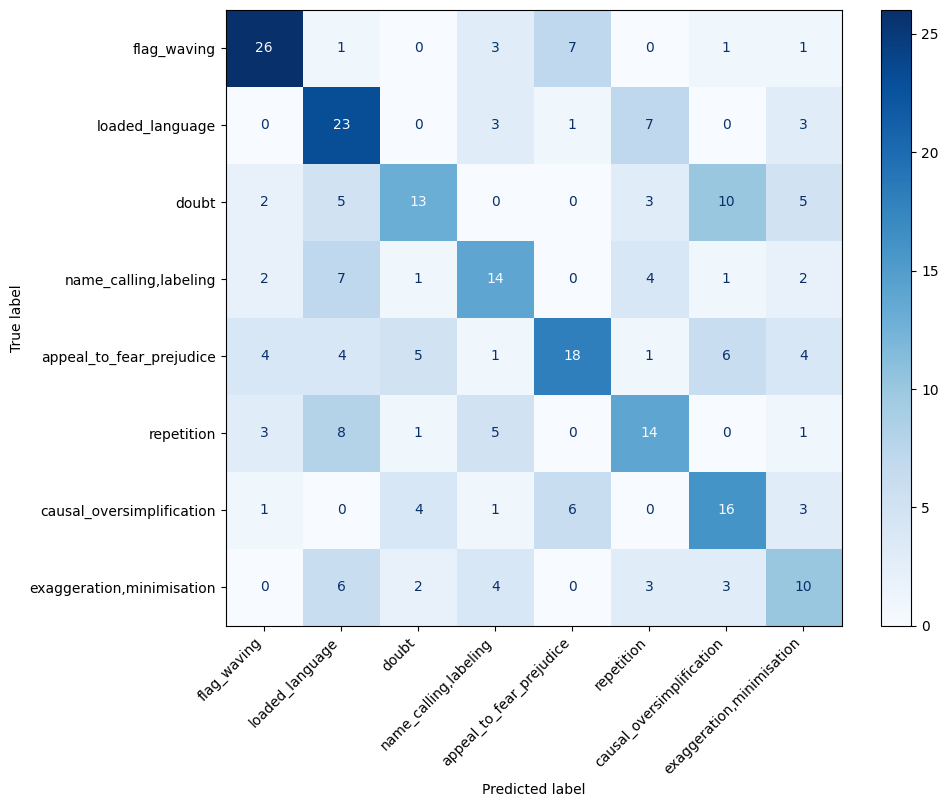

In [ ]:
# Task 2: Classify the Propaganda Technique
# Approach 1: Bag of Words Classifier
# Import necessary libraries
!pip install sklearn matplotlib --quiet

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define paths to the datasets
train_path = '/content/drive/My Drive/propaganda_dataset_v2/propaganda_train.tsv'
val_path = '/content/drive/My Drive/propaganda_dataset_v2/propaganda_val.tsv'

# Load the datasets
train_df = pd.read_csv(train_path, sep='\t')
val_df = pd.read_csv(val_path, sep='\t')

# Extract text between <BOS> and <EOS> tags
def extract_text_between_tags(text):
    try:
        return text.split('<BOS>')[1].split('<EOS>')[0].strip()
    except IndexError:
        return text  # Fallback to the original text if tags are not found

# Filter out 'not_propaganda' rows for multi-class classification task
multi_train_df = train_df[train_df['label'] != 'not_propaganda']
multi_val_df = val_df[val_df['label'] != 'not_propaganda']

# Extract the relevant text
multi_train_df['text'] = multi_train_df['tagged_in_context'].apply(extract_text_between_tags)
multi_val_df['text'] = multi_val_df['tagged_in_context'].apply(extract_text_between_tags)

# Vectorise the text using Bag of Words
vectoriser = CountVectorizer()

X_train = vectoriser.fit_transform(multi_train_df['text'])
y_train = multi_train_df['label']

X_val = vectoriser.transform(multi_val_df['text'])
y_val = multi_val_df['label']

# Train a Logistic Regression model for multi-class classification
multi_model = LogisticRegression(max_iter=1000, multi_class='ovr')
multi_model.fit(X_train, y_train)

# Evaluate the model
y_pred = multi_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay & https://scikit-learn.org/stable/modules/model_evaluation.html
# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=multi_train_df['label'].unique())

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=multi_train_df['label'].unique()) #Decides label order
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=45, ha='right')
plt.show()


Transformers version: 4.41.1
Accelerate version: 0.30.1
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
propaganda_train.tsv  propaganda_val.tsv


,label,tagged_in_context
2,flag_waving,The Obama administration misled the <BOS> Amer...
5,loaded_language,"Hitler <BOS> annihilated <EOS> 400,000 Germans..."
8,doubt,"As noted above, at this point literally every ..."
10,"name_calling,labeling",His account was suspended for violating Twitte...
12,appeal_to_fear_prejudice,A couple of seemingly unrelated events this pa...


,label,tagged_in_context
1,causal_oversimplification,Mostly because <BOS> the country would not las...
2,appeal_to_fear_prejudice,Lyndon Johnson <BOS> gets Earl Warren and Sen....
4,repetition,It must be exacted from him directly in order ...
5,"name_calling,labeling",Is it any wonder that priests and laity alike ...
6,loaded_language,Health workers have been asked to work with co...


American people
annihilated
so-called evidence
hateful conduct
point to Iran’s positioning itself for more aggressive military actions that could place U.S. forces in harm’s way
more
But who authorized this strategic commitment
the only reason why there is general interest in the Qur’an among non-Muslims is to seek an answer to the question of whether or not it justifies and encourages Islamic terrorism
We must ask ourselves why this hasn’t happened
sneaky
the country would not last long without an outside high IQ elite to run the country
gets Earl Warren and Sen. Richard Russel to join the Warren Commission by telling them that the assassination could lead to World War III
infidels
the "gay lifestyle
devastating communities
Iran’s long rap sheet of aggression against America
Now, the pope’s reply to my testimony was: “I will not say a word!” But then, contradicting himself, he has compared his silence to that of Jesus in Nazareth and before Pilate
triumphant
our
This will not only ser

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,2.089400,2.003171,0.258065,0.170621,0.132736,0.258065
2,1.884400,1.702344,0.401434,0.382971,0.428151,0.401434
3,1.476000,1.402190,0.476703,0.464640,0.519768,0.476703
4,1.072800,1.184224,0.594982,0.585436,0.602514,0.594982
5,0.633100,1.330259,0.534050,0.532854,0.615864,0.534050


Epoch 1.0: Validation Accuracy: 0.25806451612903225


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2.0: Validation Accuracy: 0.4014336917562724
Epoch 3.0: Validation Accuracy: 0.4767025089605735
Epoch 4.0: Validation Accuracy: 0.5949820788530465
Epoch 5.0: Validation Accuracy: 0.5340501792114696


{'eval_loss': 1.330258846282959, 'eval_accuracy': 0.5340501792114696, 'eval_f1': 0.5328536548675908, 'eval_precision': 0.6158640791705309, 'eval_recall': 0.5340501792114696, 'eval_runtime': 0.6534, 'eval_samples_per_second': 426.985, 'eval_steps_per_second': 27.547, 'epoch': 5.0}


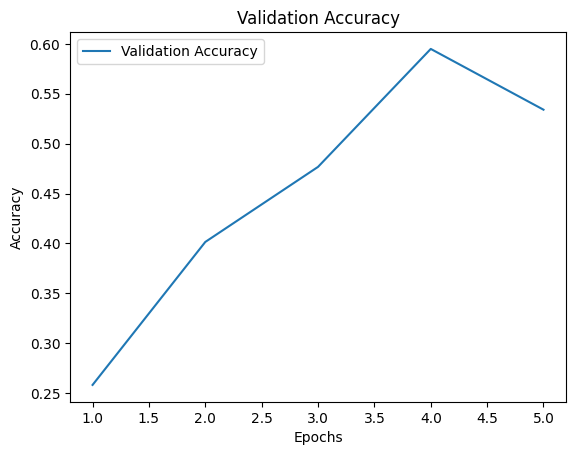

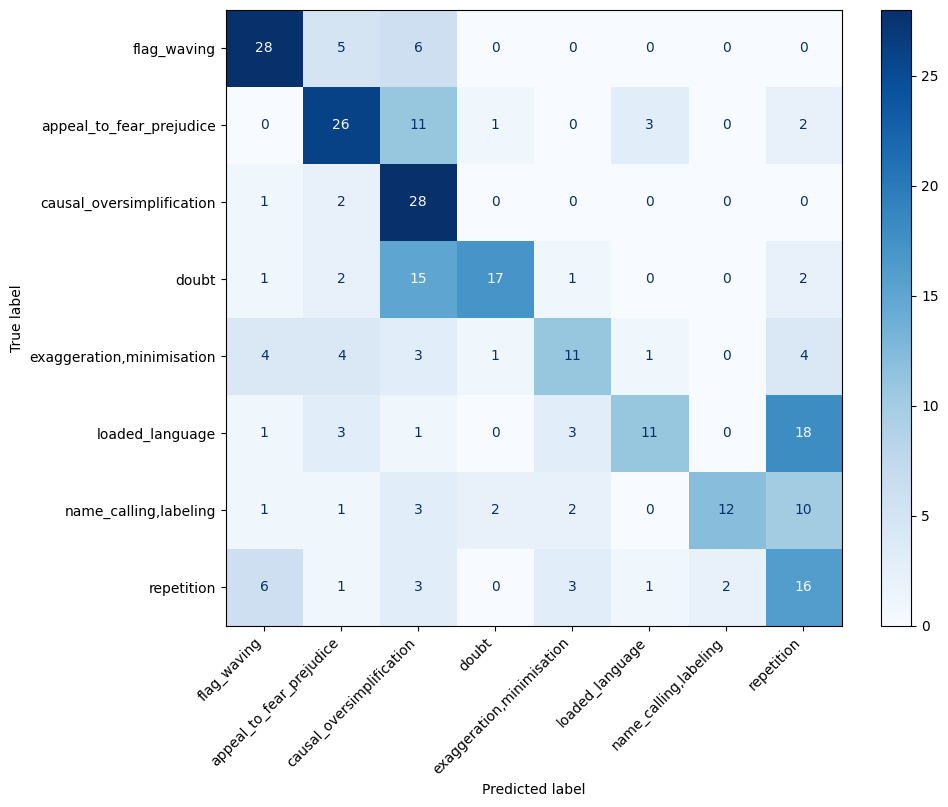

In [ ]:
# Approach 2: BERT
# Forcefully upgrade transformers and accelerate as they wouldn't update
!pip install transformers[torch] --upgrade --no-cache-dir
!pip install accelerate --upgrade --no-cache-dir

import transformers
import accelerate
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, TrainerCallback
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Print the versions to ensure they are correct
print("Transformers version:", transformers.__version__)
print("Accelerate version:", accelerate.__version__)

# Mount Google Drive to access the dataset files (if using Google Drive)
from google.colab import drive
drive.mount('/content/drive')

# List files in the specified directory to confirm the correct paths
!ls '/content/drive/My Drive/propaganda_dataset_v2/'

# Ensure the correct paths to your dataset files
train_path = '/content/drive/My Drive/propaganda_dataset_v2/propaganda_train.tsv'
val_path = '/content/drive/My Drive/propaganda_dataset_v2/propaganda_val.tsv'

# Load the datasets into pandas dataframes
train_df = pd.read_csv(train_path, sep='\t')
val_df = pd.read_csv(val_path, sep='\t')

# Filter out 'not_propaganda' rows for multi-class classification task
train_df = train_df[train_df['label'] != 'not_propaganda']
val_df = val_df[val_df['label'] != 'not_propaganda']

# Display the first few rows to confirm data loading
display(train_df.head())
display(val_df.head())

# Function to convert labels to integer format
def label_to_int(label):
    label_dict = {
        'flag_waving': 0,
        'appeal_to_fear_prejudice': 1,
        'causal_oversimplification': 2,
        'doubt': 3,
        'exaggeration,minimisation': 4,
        'loaded_language': 5,
        'name_calling,labeling': 6,
        'repetition': 7
    }
    return label_dict[label]

# Function to extract text between <BOS> and <EOS> tags
def extract_text_between_tags(text):
    try:
        return text.split('<BOS>')[1].split('<EOS>')[0].strip()
    except IndexError:
        return text

# Function to preprocess the data by tokenising the text and encoding the labels, Bert Tokeniser: https://huggingface.co/docs/transformers/v4.41.2/en/model_doc/bert#transformers.BertTokenizer
def preprocess_data(df):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # Load the pre-trained BERT tokeniser
    texts = df['tagged_in_context'].apply(extract_text_between_tags).tolist()  # Extract the text data between tags
    labels = df['label'].apply(lambda x: label_to_int(x)).tolist()  # Convert labels to integer format
    encodings = tokenizer(texts, truncation=True, padding=True)  # Tokenise the text data
    # Print extracted text
    for text in texts[:10]:  # Print first 10 extracted texts
        print(text)
    return encodings, labels

# Preprocess the training and validation data
train_encodings, train_labels = preprocess_data(train_df)
val_encodings, val_labels = preprocess_data(val_df)

# Custom Dataset class to handle the tokenised inputs and labels
# Adapted from Hugging Face tutorial: https://huggingface.co/transformers/custom_datasets.html
class PropagandaDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}  # Convert to tensors
        item['labels'] = torch.tensor(self.labels[idx])  # Add the labels
        return item

    def __len__(self):
        return len(self.labels)

# Create Dataset objects for training and validation data
train_dataset = PropagandaDataset(train_encodings, train_labels)
val_dataset = PropagandaDataset(val_encodings, val_labels)

# Load the pre-trained BERT model for sequence classification
# Documentation: https://huggingface.co/transformers/model_doc/bert.html#transformers.BertForSequenceClassification (lab 9) (https://huggingface.co/transformers/v2.4.0/quickstart.html)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=8) #8 Different classses

# Define the training arguments
# Adapted from Hugging Face tutorial: https://huggingface.co/docs/transformers/v4.41.2/en/tasks/object_detection#training-the-detection-model
training_args = TrainingArguments(
    output_dir='./results',  # Directory to save the results
    num_train_epochs=5,  # Number of training epochs
    per_device_train_batch_size=16,  # Batch size for training
    per_device_eval_batch_size=16,  # Batch size for evaluation
    warmup_steps=500,  # Number of warmup steps for learning rate scheduler
    weight_decay=0.01,  # Weight decay for optimiser
    logging_dir='./logs',  # Directory to save the logs
    evaluation_strategy="epoch",  # Evaluate at each epoch
    logging_strategy="epoch",  # Log at each epoch
    learning_rate=5e-5  # Learning rate
)

# Function to compute evaluation metrics
# Documentation for metrics: https://scikit-learn.org/stable/modules/model_evaluation.html
def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)  # Get the predicted labels
    precision, recall, f1, _ = precision_recall_fscore_support(labels, pred, average='weighted')  # Calculate precision, recall, f1 score
    acc = accuracy_score(labels, pred)  # Calculate accuracy
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# Define a callback to log accuracy Adapted from: https://huggingface.co/transformers/main_classes/trainer.html#transformers.TrainerCallback & https://huggingface.co/docs/transformers/v4.41.2/en/main_classes/callback#transformers.TrainerCallback.on_log
class AccuracyCallback(TrainerCallback):
    def __init__(self):
        self.val_acc = []
        self.current_epoch = 0

    def on_evaluate(self, args, state, control, metrics=None, **kwargs):
        if metrics is not None:
            # Log only if this is an epoch end evaluation, fixed epoch issue
            if state.is_local_process_zero:
                if state.epoch > self.current_epoch:
                    self.current_epoch = state.epoch
                    print(f"Epoch {state.epoch}: Validation Accuracy: {metrics['eval_accuracy']}")
                    self.val_acc.append(metrics["eval_accuracy"])

# Initialise the callback
accuracy_callback = AccuracyCallback()

# Initialise the Trainer with the model, training arguments, datasets, and metrics function
# Documentation: https://huggingface.co/transformers/training.html
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[accuracy_callback],
)

# Train the model
trainer.train()

# Evaluate the model on the validation dataset
results = trainer.evaluate()
print(results)  # Print the evaluation results

# Plot the training and validation accuracy
epochs = range(1, len(accuracy_callback.val_acc) + 1)
plt.plot(epochs, accuracy_callback.val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')
plt.show()

# Generate predictions for the validation dataset
predictions = trainer.predict(val_dataset)
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay & https://scikit-learn.org/stable/modules/model_evaluation.html

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=list(range(8)))

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[
    'flag_waving', 'appeal_to_fear_prejudice', 'causal_oversimplification', 'doubt',
    'exaggeration,minimisation', 'loaded_language', 'name_calling,labeling', 'repetition'
])
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=45, ha='right')
plt.show()


Documentation accessed: 10th-29th May, 2024